In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
sns.set_style('darkgrid')
sns.set_context('talk')
plt.rcParams['figure.figsize']=(20,10)

In [2]:
df=pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
scores=['math score','reading score','writing score']
features=['gender','lunch','parental level of education','test preparation course']

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

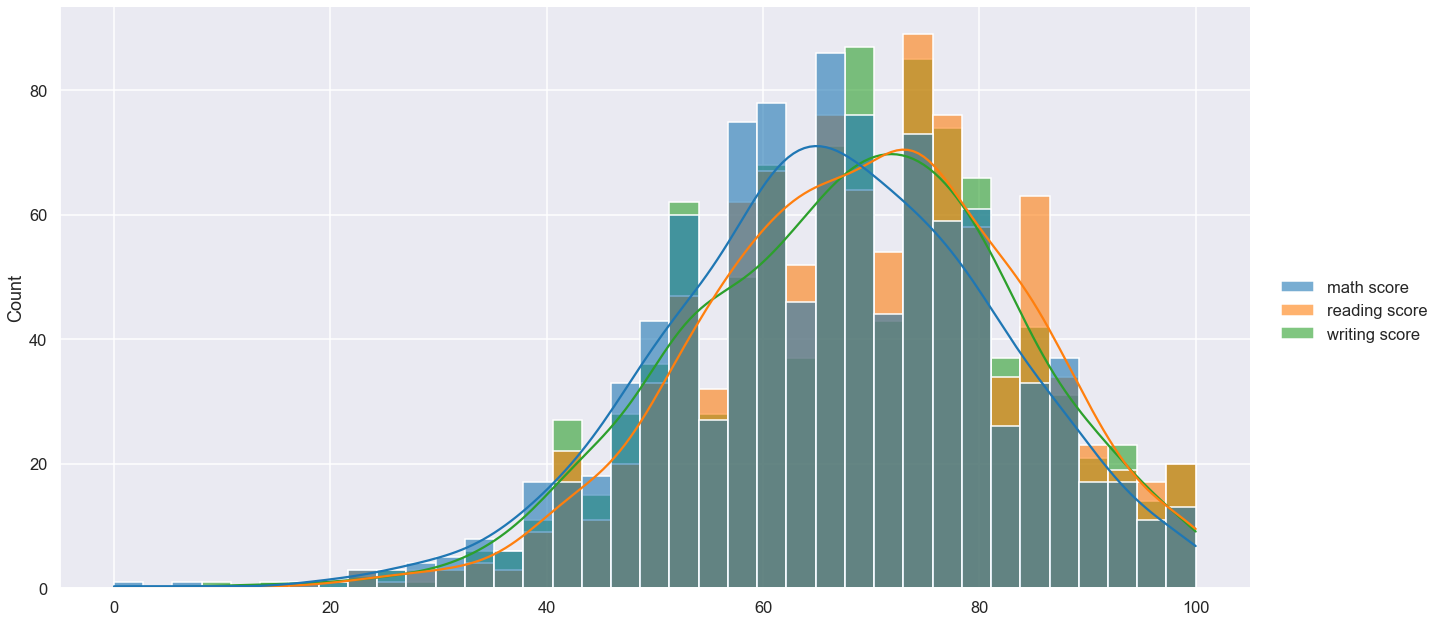

In [7]:
sns.displot(df[scores],height=9,aspect=2,kde=True,alpha=0.6);

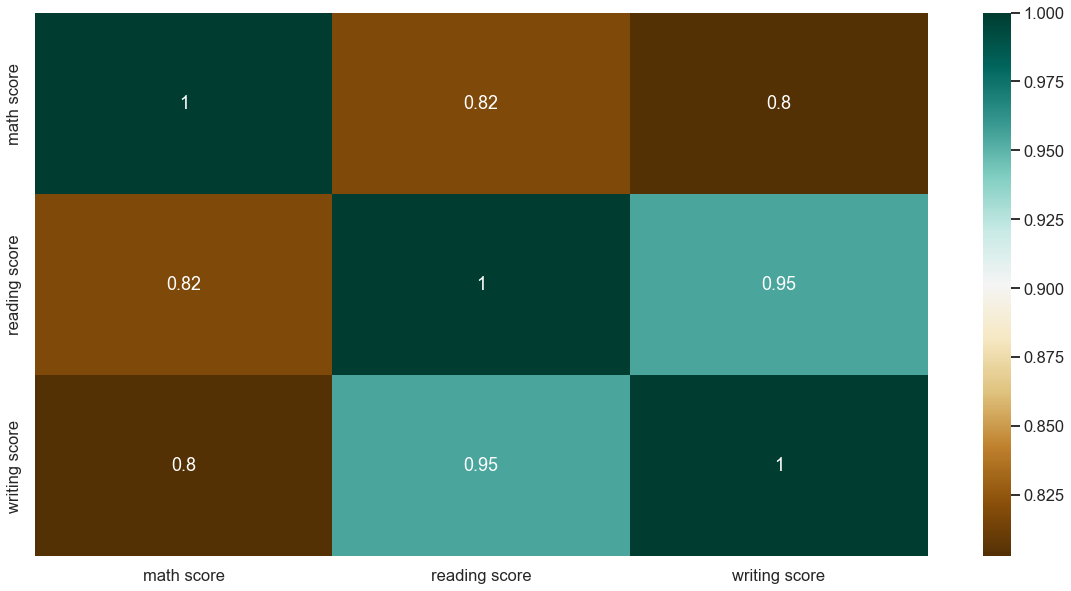

In [8]:
sns.heatmap(df[scores].corr(),annot=True,cmap='BrBG');

In [9]:
def plot_hist(df,x,cat_var,alpha=0.6,kde=True):
    sns.histplot(data=df,x=x,alpha=alpha,kde=kde,legend=True,hue=cat_var);

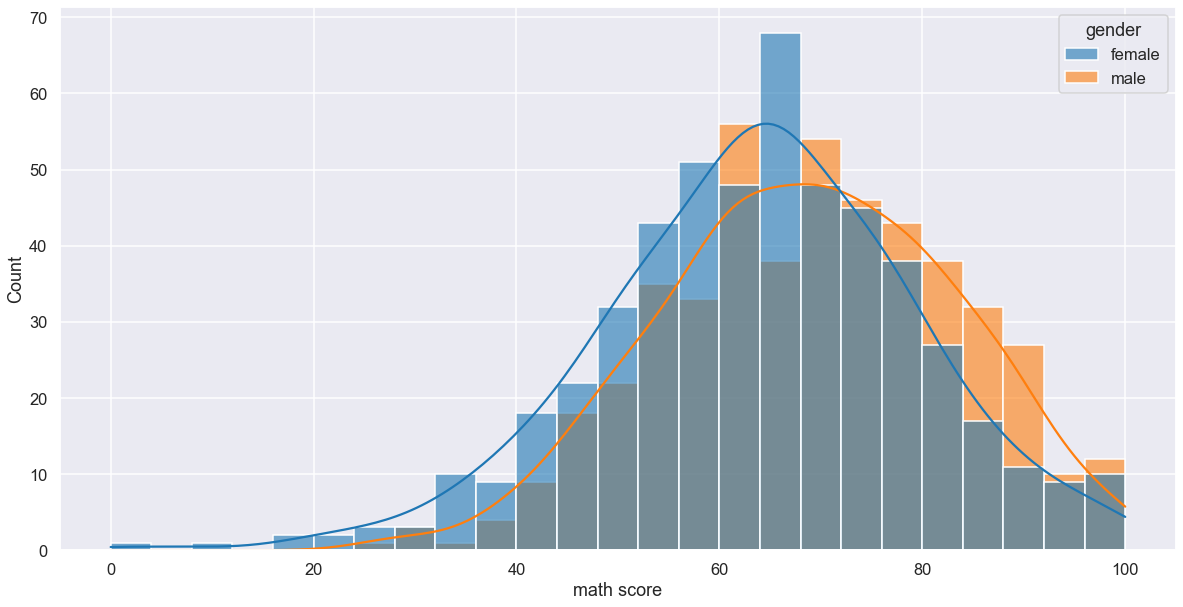

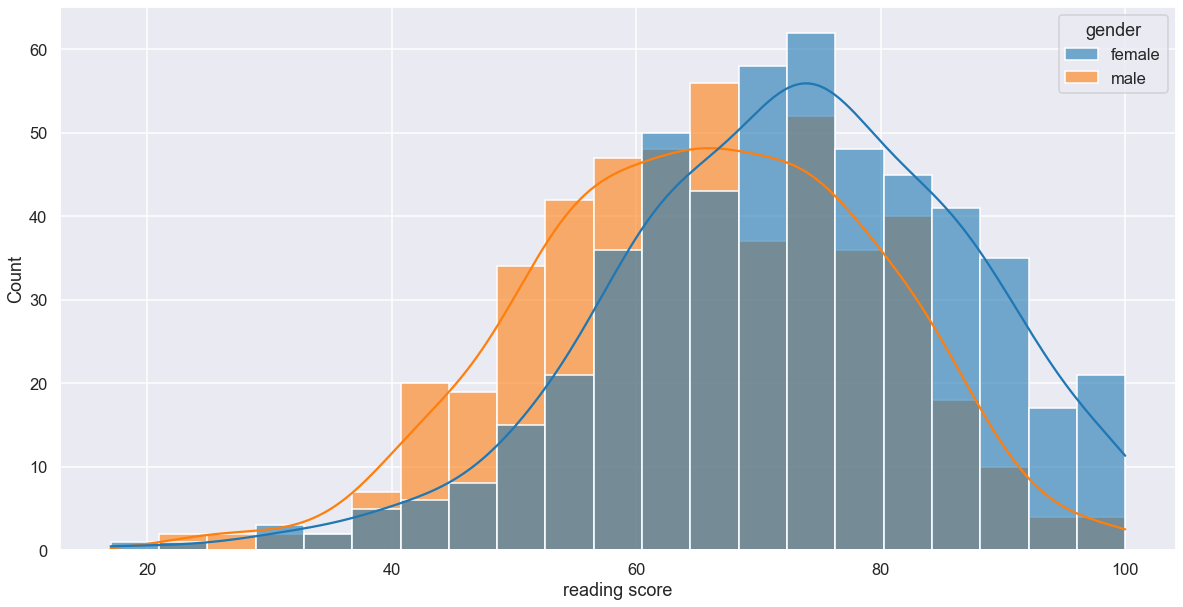

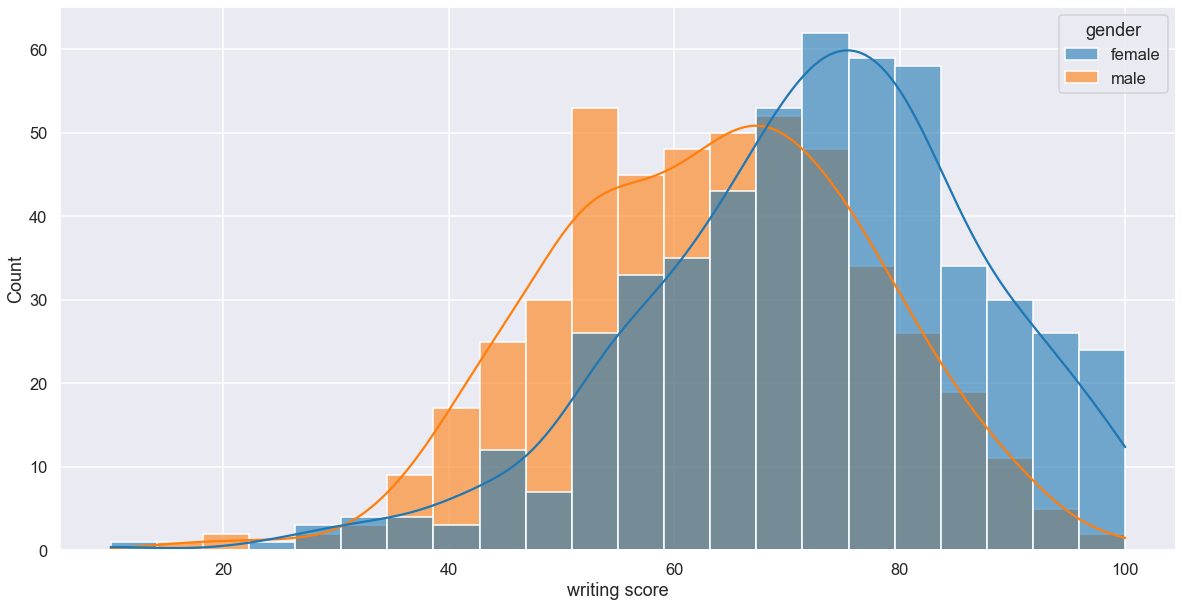

In [10]:
plot_hist(df,'math score','gender')
plt.show()
plot_hist(df,'reading score','gender')
plt.show()
plot_hist(df,'writing score','gender')
plt.show()

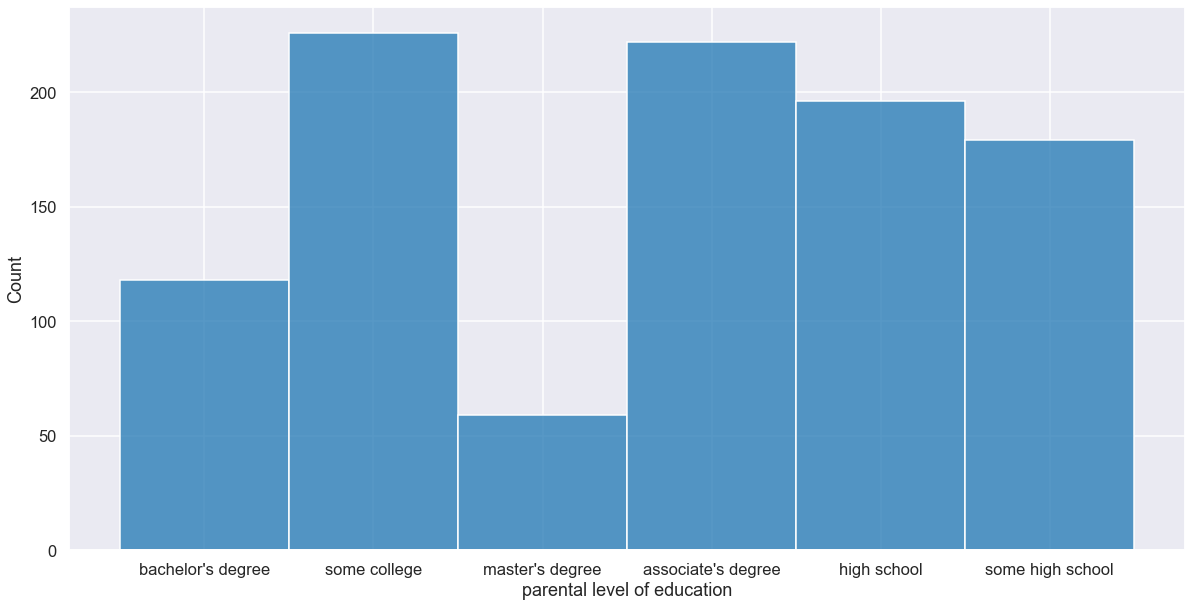

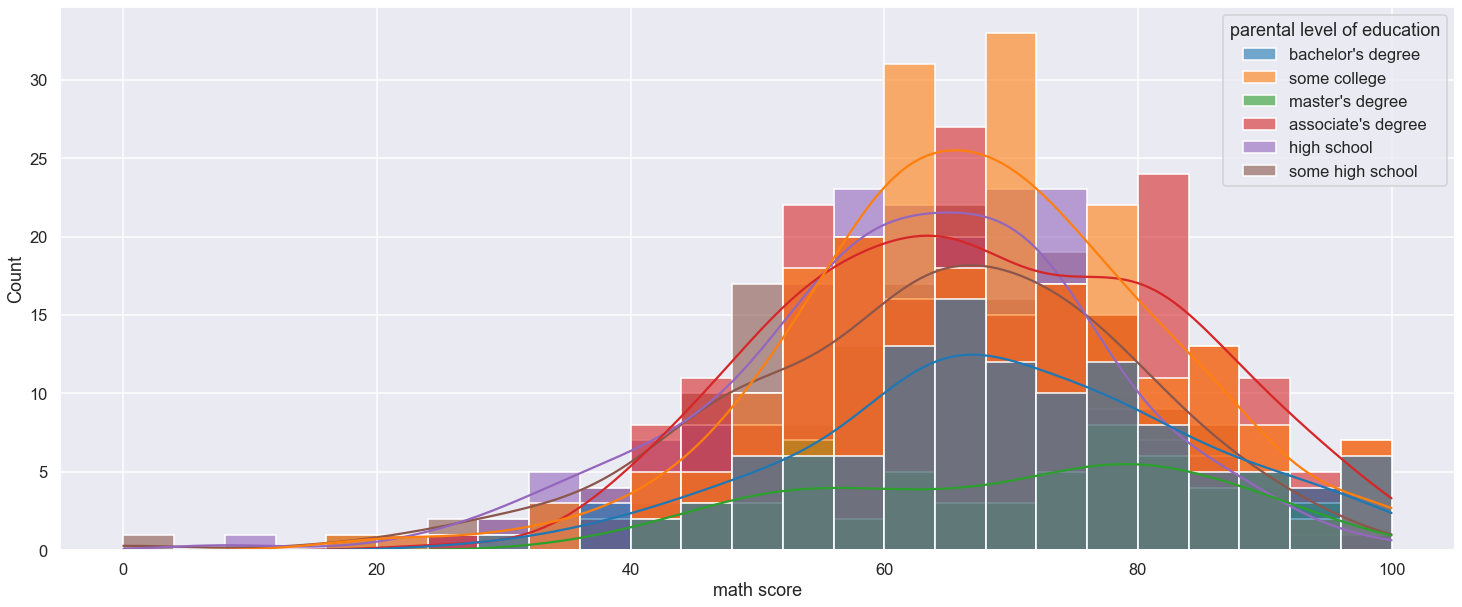

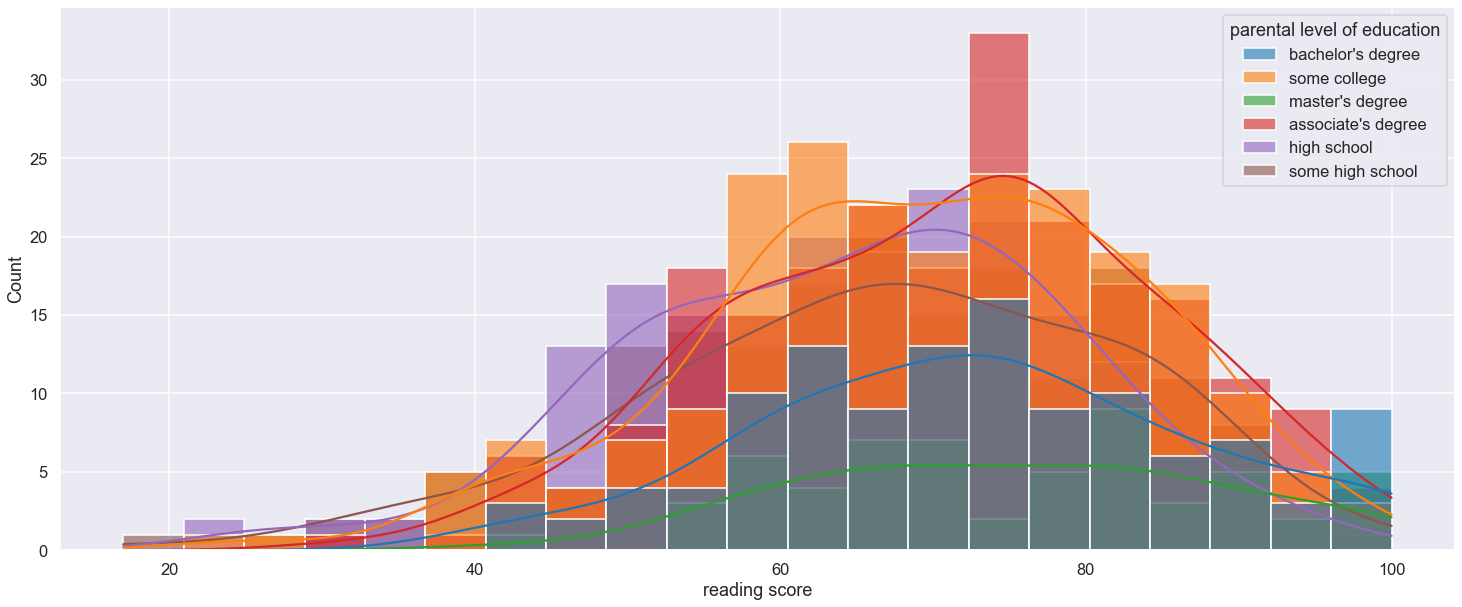

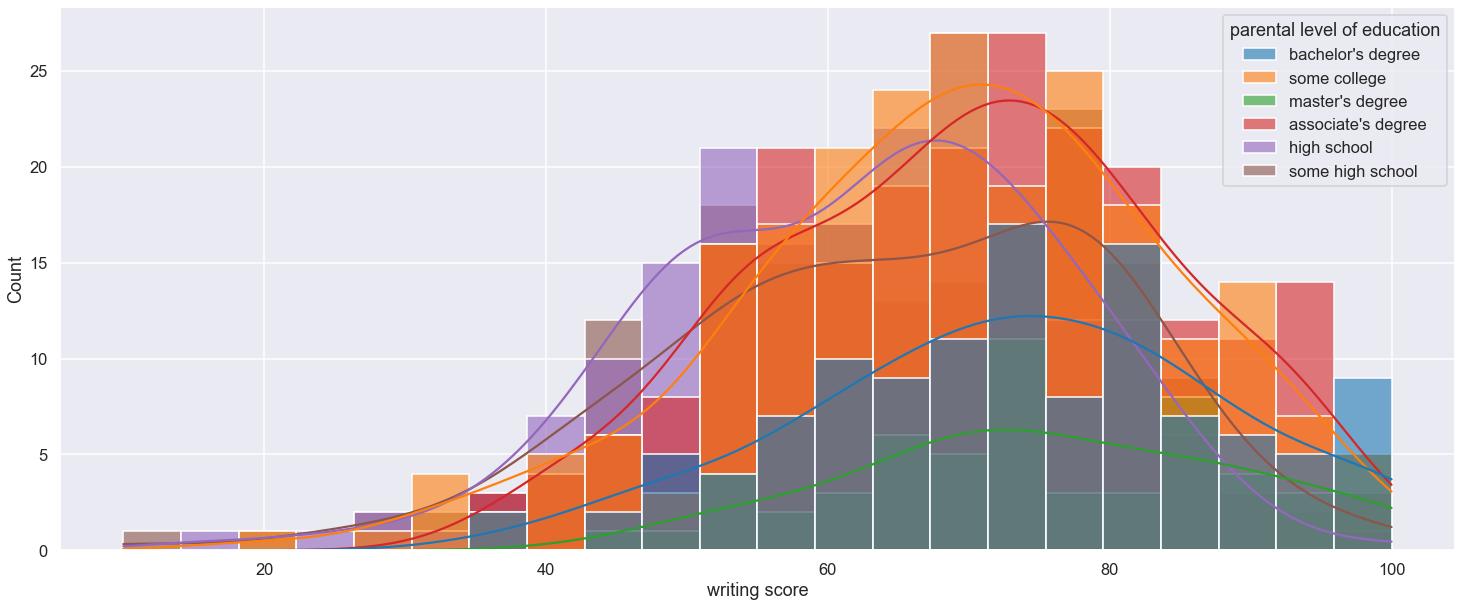

In [11]:
sns.histplot(df['parental level of education']);
plt.show()
plt.figure(figsize=(25,10))
plot_hist(df,'math score','parental level of education')
plt.show()
plt.figure(figsize=(25,10))
plot_hist(df,'reading score','parental level of education')
plt.show()
plt.figure(figsize=(25,10))
plot_hist(df,'writing score','parental level of education')
plt.show()

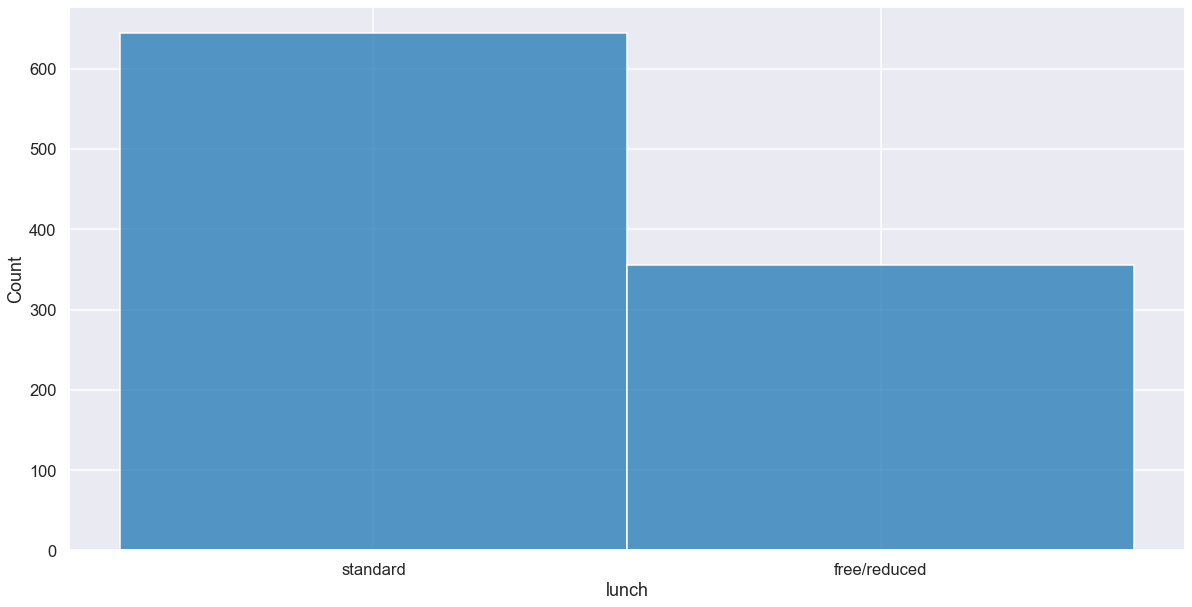

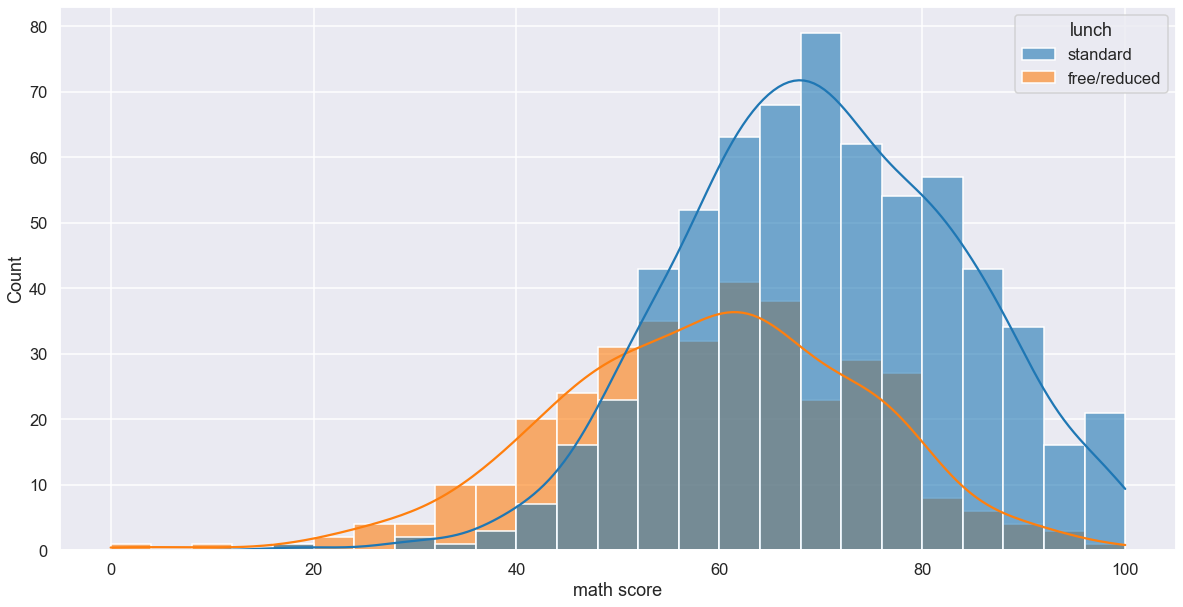

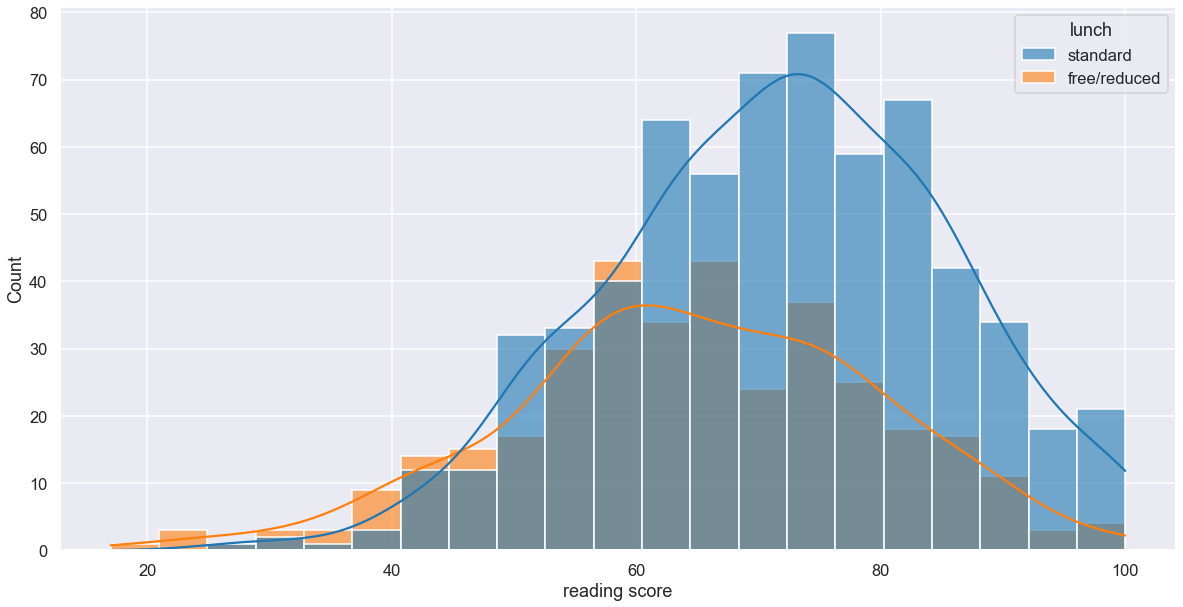

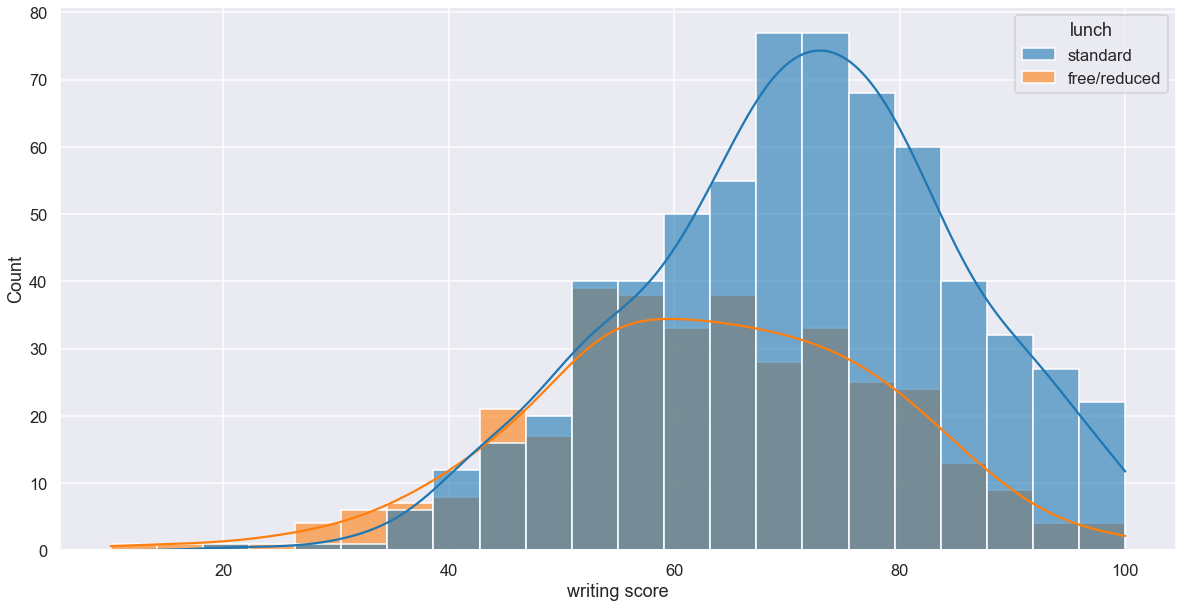

In [12]:
sns.histplot(df['lunch'])
plt.show()
plot_hist(df,'math score','lunch')
plt.show()
plot_hist(df,'reading score','lunch')
plt.show()
plot_hist(df,'writing score','lunch')
plt.show()

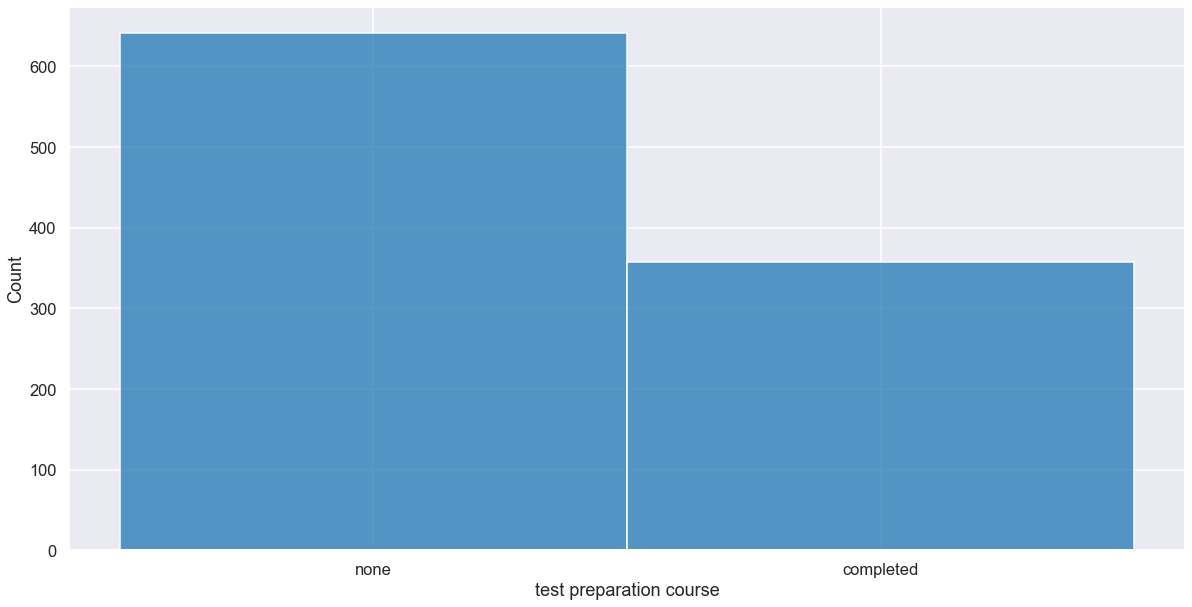

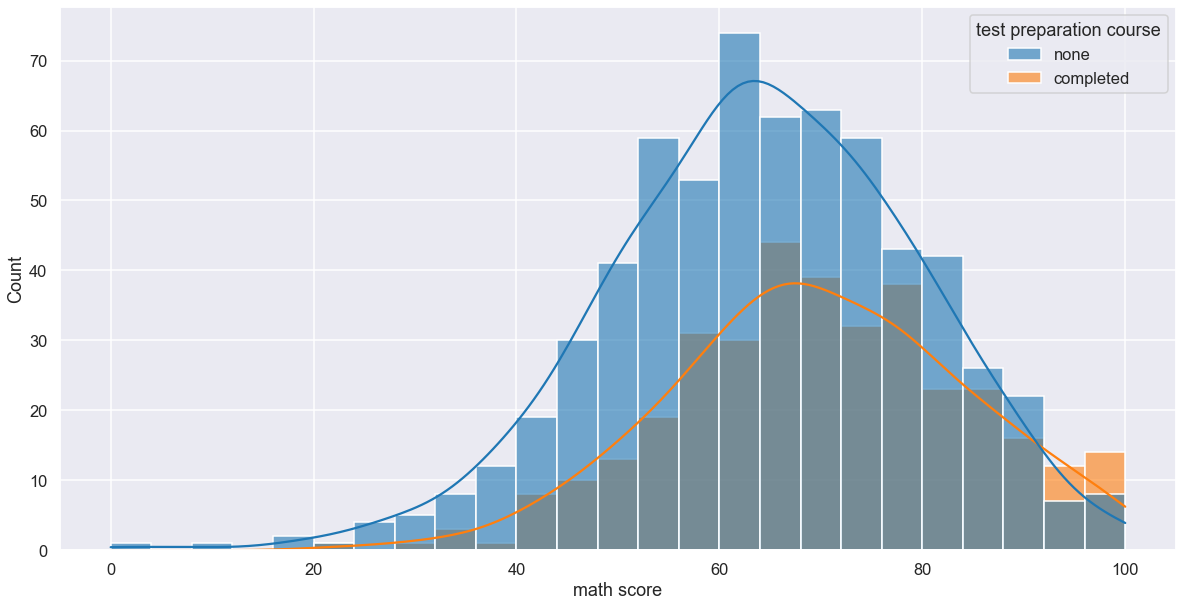

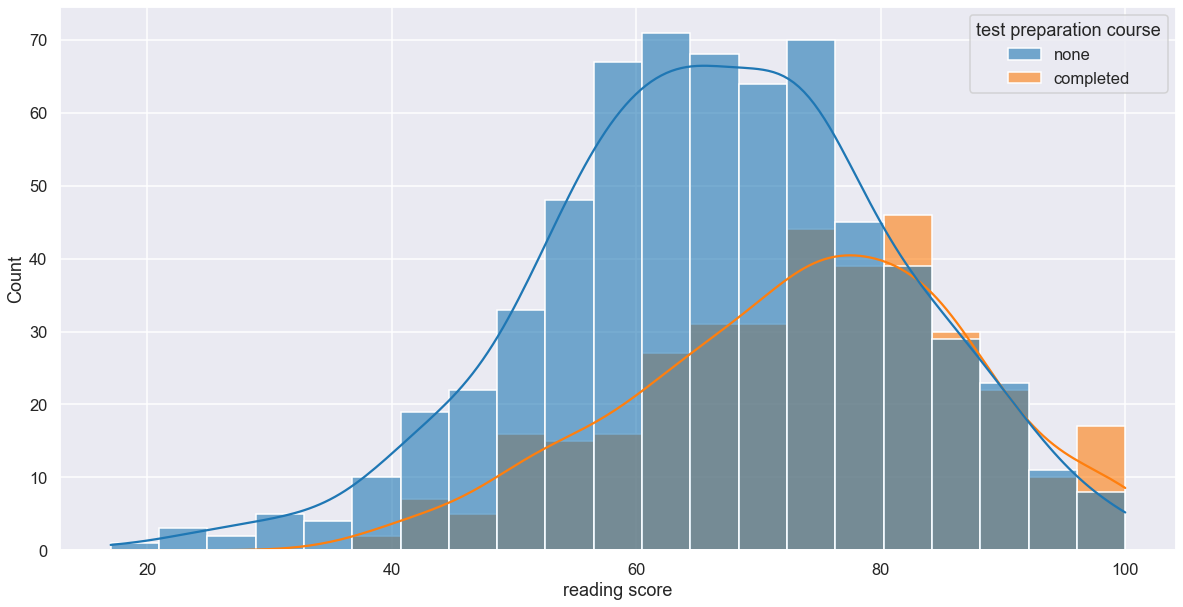

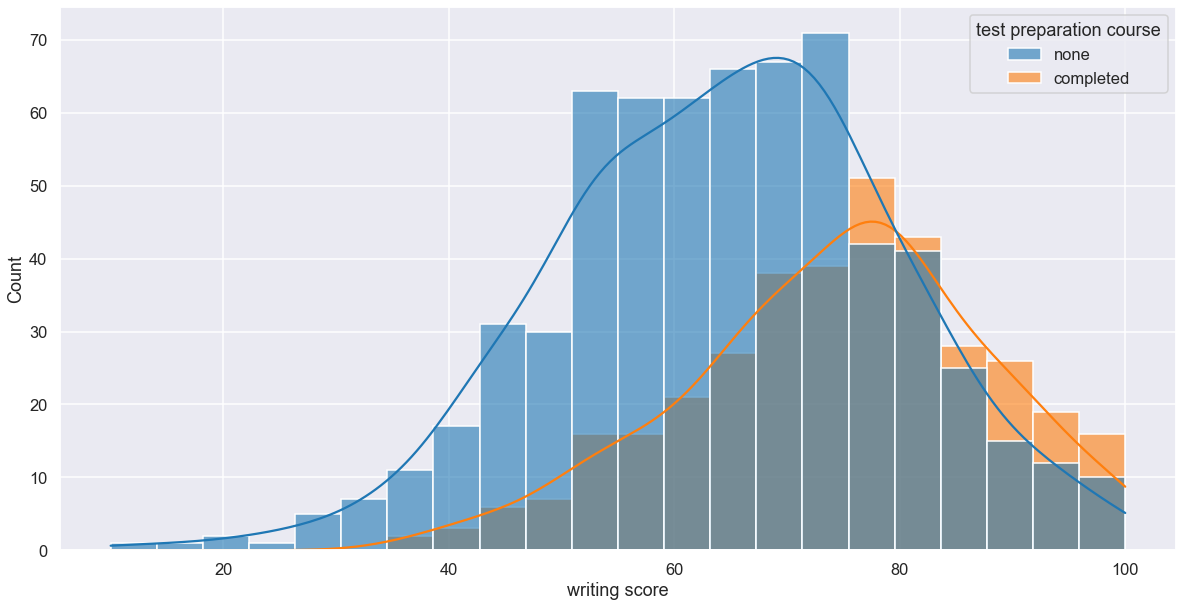

In [13]:
sns.histplot(df['test preparation course'])
plt.show()
plot_hist(df,'math score','test preparation course')
plt.show()
plot_hist(df,'reading score','test preparation course')
plt.show()
plot_hist(df,'writing score','test preparation course')
plt.show()

In [14]:
df=pd.read_csv('StudentsPerformance.csv')

In [15]:
dummies=pd.get_dummies(df)
dummies.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [16]:
male=dummies[dummies["gender_male"]==1]
female=dummies[dummies["gender_female"]==1]

master_degree=dummies[dummies["parental level of education_master's degree"]==1]
bachelor_degree=dummies[dummies["parental level of education_bachelor's degree"]==1]
associate_degree=dummies[dummies["parental level of education_associate's degree"]==1]
some_college=dummies[dummies["parental level of education_some college"]==1]
highschool=dummies[dummies["parental level of education_high school"]==1]
some_highschool=dummies[dummies["parental level of education_some high school"]==1]

lunch_free=dummies[dummies["lunch_free/reduced"]==1]
lunch_standard=dummies[dummies["lunch_standard"]==1]

course_yes=dummies[dummies["test preparation course_completed"]==1]
course_no=dummies[dummies["test preparation course_none"]==1]

In [17]:
male_math_score=male["math score"]
female_math_score=female["math score"]
master_degree_math_score=master_degree["math score"]
bachelor_degree_math_score=bachelor_degree["math score"]
associate_degree_math_score=associate_degree["math score"]
some_college_math_score=some_college["math score"]
highschool_math_score=highschool["math score"]
some_highschool_math_score=some_highschool["math score"]
lunch_free_math_score=lunch_free["math score"]
lunch_standard_math_score=lunch_standard["math score"]
course_yes_math_score=course_yes["math score"]
course_no_math_score=course_no["math score"]

In [18]:
male_reading_score=male["reading score"]
female_reading_score=female["reading score"]
master_degree_reading_score=master_degree["reading score"]
bachelor_degree_reading_score=bachelor_degree["reading score"]
associate_degree_reading_score=associate_degree["reading score"]
some_college_reading_score=some_college["reading score"]
highschool_reading_score=highschool["reading score"]
some_highschool_reading_score=some_highschool["reading score"]
lunch_free_reading_score=lunch_free["reading score"]
lunch_standard_reading_score=lunch_standard["reading score"]
course_yes_reading_score=course_yes["reading score"]
course_no_reading_score=course_no["reading score"]

In [19]:
male_writing_score=male["writing score"]
female_writing_score=female["writing score"]
master_degree_writing_score=master_degree["writing score"]
bachelor_degree_writing_score=bachelor_degree["writing score"]
associate_degree_writing_score=associate_degree["writing score"]
some_college_writing_score=some_college["writing score"]
highschool_writing_score=highschool["writing score"]
some_highschool_writing_score=some_highschool["writing score"]
lunch_free_writing_score=lunch_free["writing score"]
lunch_standard_writing_score=lunch_standard["writing score"]
course_yes_writing_score=course_yes["writing score"]
course_no_writing_score=course_no["writing score"]

In [20]:
male=[]
female=[]
master_degree=[]
bachelor_degree=[]
associate_degree=[]
some_college=[]
highschool=[]
some_highschool=[]
lunch_free=[]
lunch_standard=[]
course_yes=[]
course_no=[]

for i in male_math_score.index:
    a=(male_math_score[i]+male_reading_score[i]+male_writing_score[i])/3
    male.append(a)
    
for i in female_math_score.index:
    a=(female_math_score[i]+female_reading_score[i]+female_writing_score[i])/3
    female.append(a)
    
for i in master_degree_math_score.index:
    a=(master_degree_math_score[i]+master_degree_reading_score[i]+master_degree_writing_score[i])/3
    master_degree.append(a)
    
for i in bachelor_degree_math_score.index:
    a=(bachelor_degree_math_score[i]+bachelor_degree_reading_score[i]+bachelor_degree_writing_score[i])/3
    bachelor_degree.append(a)
    
for i in associate_degree_math_score.index:
    a=(associate_degree_math_score[i]+associate_degree_reading_score[i]+associate_degree_writing_score[i])/3
    associate_degree.append(a)
    
for i in some_college_math_score.index:
    a=(some_college_math_score[i]+some_college_reading_score[i]+some_college_writing_score[i])/3
    some_college.append(a)
    
for i in highschool_math_score.index:
    a=(highschool_math_score[i]+highschool_reading_score[i]+highschool_writing_score[i])/3
    highschool.append(a)
    
for i in some_highschool_math_score.index:
    a=(some_highschool_math_score[i]+some_highschool_reading_score[i]+some_highschool_writing_score[i])/3
    some_highschool.append(a)
    
for i in lunch_free_math_score.index:
    a=(lunch_free_math_score[i]+lunch_free_reading_score[i]+lunch_free_writing_score[i])/3
    lunch_free.append(a)
    
for i in lunch_standard_writing_score.index:
    a=(lunch_standard_math_score[i]+lunch_standard_reading_score[i]+lunch_standard_writing_score[i])/3
    lunch_standard.append(a)

for i in course_yes_writing_score.index:
    a=(course_yes_math_score[i]+course_yes_reading_score[i]+course_yes_writing_score[i])/3
    course_yes.append(a)
    
for i in course_no_writing_score.index:
    a=(course_no_math_score[i]+course_no_reading_score[i]+course_no_writing_score[i])/3
    course_no.append(a)

In [21]:
t_test_gender=stats.ttest_ind(male,female)
Anova_edu=stats.f_oneway(master_degree,bachelor_degree,
                         associate_degree,some_college,highschool,some_highschool)
t_test_lunch=stats.ttest_ind(lunch_free,lunch_standard)
t_test_course=stats.ttest_ind(course_yes,course_no)

In [22]:
dict_pvalue={'p-value':[t_test_gender[1],Anova_edu[1],t_test_lunch[1],t_test_course[1]]}

df_pvalue=pd.DataFrame(dict_pvalue,index=['Two-sample t-test - gender','ANOVA - parental education',
                                                       'Two-sample t-test - lunch','Two-sample t-test - course'])
df_pvalue

,p-value
Two-sample t-test - gender,3.311974e-05
ANOVA - parental education,4.381046e-10
Two-sample t-test - lunch,7.736792e-21
Two-sample t-test - course,1.633780e-16
